<a href="https://colab.research.google.com/github/galaxy-kim/Python_note_backup/blob/main/06_jan_%EC%A1%B0%EB%B3%84%ED%99%9C%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##조별 활동_변수 추출


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/Ashopping2.csv",encoding="cp949")
data

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [11]:
data.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
dtype: int64

In [16]:
data.dropna(axis=0,inplace=True)
#inplace=True → dropna한 데이터를 프레임 안으로 넣을 것을 지정

In [17]:
from sklearn.feature_selection import SelectKBest,chi2

#데이터 지정(변수)
X=data.drop(["고객ID","친절성"],axis=1)
Y=data["친절성"]

#데이터 분할
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#일변량 통계기반 변수 선택
selector=SelectKBest()
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["Chi2"]=selector.scores_
score["p-value"]=selector.pvalues_
score["support"]=selector.get_support()
score["attribute"]=X_train.columns
score[score["support"]==True]

,Chi2,p-value,support,attribute
24,9.939681,8.722440e-08,True,상품_다양성
25,11.873868,2.792788e-09,True,가격_적절성
27,9.478387,1.985858e-07,True,상품_설명_표시
29,13.893850,7.836666e-11,True,공간_편의성
30,11.349794,7.084399e-09,True,시야_확보성
32,25.474222,1.797690e-19,True,안내_표지판_설명
33,45.708827,2.068609e-33,True,신속성
34,22.549852,2.461308e-17,True,책임성
35,32.863328,9.918917e-25,True,정확성
36,47.079122,2.645028e-34,True,전문성


In [31]:
#모형기반 선택

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0),threshold="median")
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["attribute"]=X_train.columns
score["support"]=selector.get_support()
score[score["support"]==True]

,attribute,support
1,총_매출액,True
2,방문빈도,True
3,1회_평균매출액,True
5,총_할인_금액,True
13,거래기간,True
15,멤버쉽_프로그램_가입전_만족도,True
20,상품_만족도,True
24,상품_다양성,True
25,가격_적절성,True
26,상품_진열_위치,True


##조별 활동_data balancing

In [32]:
#under-sampling

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under,Y_train_under=RandomUnderSampler(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 언더샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("under train data %s"%Counter(Y_train_under))

original data Counter({6: 311, 5: 296, 4: 143, 7: 76, 3: 15})
original train data Counter({6: 221, 5: 207, 4: 98, 7: 51, 3: 11})
under train data Counter({3: 11, 4: 11, 5: 11, 6: 11, 7: 11})


In [33]:
#over-sampling

from imblearn.over_sampling import SMOTE #synthetic minority over-sampling techniques

X_train_over,Y_train_over=SMOTE(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 오버샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("over train data %s"%Counter(Y_train_over))

original data Counter({6: 311, 5: 296, 4: 143, 7: 76, 3: 15})
original train data Counter({6: 221, 5: 207, 4: 98, 7: 51, 3: 11})
over train data Counter({5: 221, 4: 221, 6: 221, 3: 221, 7: 221})


##조별 활동_선형회귀분석

In [36]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_te

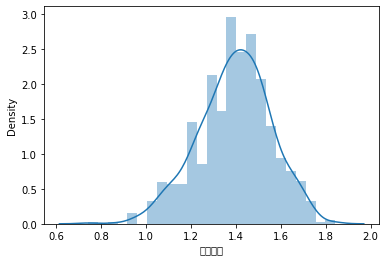

In [37]:
data["방문빈도"]=np.log1p(data["방문빈도"])
sns.distplot(data["방문빈도"])

#y에 대한 정규화(자연로그이용)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder #범주형 변수를 정수로 인식하는 것을 방지하기 위해 사용

num=['총_매출액','1회_평균매출액','할인권_사용 횟수','총_할인_금액','구매_카테고리_수','Frequency','Monetary']
cg=['고객등급','구매유형','클레임접수여부','거주지역','성별','고객_나이대']

X=data[num+cg]
Y=data["방문빈도"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#표준화, 원핫인코딩
ct=ColumnTransformer([("scling",StandardScaler(),num),("onehot",OneHotEncoder(sparse=False),cg)])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

print(X_train[0])

[-0.48005701  0.48290961  1.64847786  0.79805627 -0.10145098 -1.39606837
 -0.66650468  1.          0.          1.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.        ]


In [41]:
from sklearn.linear_model import LinearRegression #선형모델
from sklearn.metrics import mean_squared_error #MSE
from math import sqrt #루트

lr=LinearRegression().fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2:{:.3f}".format(lr.score(X_train,Y_train))) #train set_R2
print("test R2:{:.3f}".format(lr.score(X_test,Y_test)))

rmse=sqrt(mean_squared_error(Y_test,Y_pred)) #RMSE
print("RMSE : {:.3f}".format(rmse)) #오차의 합 → 0에 가까울수록 좋다

predict value
 [1.31622314 1.42578125 1.4538269  1.18081665 1.44805908 1.56915283
 1.16235352 1.56655884 1.13909912 1.05496216 1.28909302 1.19470215
 1.78872681 1.11077881 1.26977539 1.17169189 1.65304565 1.43106079
 1.33279419 1.52572632 1.53408813 1.28890991 1.16149902 1.68130493
 1.15811157 1.3046875  1.29849243 1.38470459 1.34091187 1.10177612
 1.30038452 1.28201294 1.54006958 0.98623657 1.32260132 1.38671875
 1.28515625 1.30853271 1.49060059 1.5475769  1.55535889 1.56039429
 1.53637695 1.26828003 1.46481323 1.56005859 1.60827637 1.33398438
 1.41873169 1.42544556 1.53927612 1.34860229 1.38980103 1.31600952
 1.3868103  1.44042969 1.42849731 1.58032227 1.61349487 1.56201172
 1.55636597 1.28140259 1.67657471 1.42941284 1.68228149 1.32229614
 1.17596436 1.20599365 1.16308594 1.4262085  1.581604   1.29119873
 1.65328979 1.3416748  1.50561523 1.55493164 1.33380127 1.18649292
 1.32217407 1.27209473 1.54333496 1.44293213 1.51525879 1.3135376
 1.34863281 1.16873169 1.57843018 1.7828064  1.1

In [42]:
#cg=['구매금액대','고객등급','구매유형','클레임접수여부','거주지역','성별','고객 나이대']

#Y=β0_5.204+(-0.156)총매출액+(0.388)1회평균매출액+...

print("절편",np.round(lr.intercept_,3)) #x가 모두 0일 때(y절편,상수항)
print("가중치(beta)",np.round(lr.coef_,3))

절편 -207948918651.652
가중치(beta) [ 1.50000000e-02 -3.80000000e-02 -2.00000000e-03  1.00000000e-03
  3.57022455e+09  1.14000000e-01  2.90000000e-02 -5.59260160e+10
 -7.81415631e+09  1.94418591e+11  1.94418591e+11  1.94418591e+11
  1.94418591e+11  2.02826847e+10  2.02826847e+10 -4.52125592e+09
 -7.56375927e+09 -1.06062626e+10 -1.36487660e+10  3.14205904e+10
  2.83780870e+10  2.53355837e+10  9.31741866e+09  9.31741866e+09
  8.79785279e+09  8.79785279e+09  8.79785279e+09  8.79785279e+09
  8.79785279e+09  8.79785279e+09  8.79785279e+09  8.79785279e+09
  8.79785279e+09]
